#To do
1.Download the Credit Card Transactions Fraud Detection Dataset

https://www.kaggle.com/datasets/kartik2112/fraud-detection

2.Perfrom Data Preprocessing

3.Model Building using Logistic Regression and Decision Tree and Random Forest

4.Calculate Performance metrics

#Data Preprocessing

#Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the dataset.

In [2]:
df=pd.read_csv("/content/fraudTest.csv")

In [3]:
df=df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [6]:
df.shape

(555719, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [8]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [9]:
df.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

#Checking for Null Values

In [10]:
df.isnull().any()

trans_date_trans_time    False
cc_num                   False
merchant                 False
category                 False
amt                      False
first                    False
last                     False
gender                   False
street                   False
city                     False
state                    False
zip                      False
lat                      False
long                     False
city_pop                 False
job                      False
dob                      False
trans_num                False
unix_time                False
merch_lat                False
merch_long               False
is_fraud                 False
dtype: bool

In [11]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#Data Visualization

In [12]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<Axes: xlabel='Count', ylabel='category'>

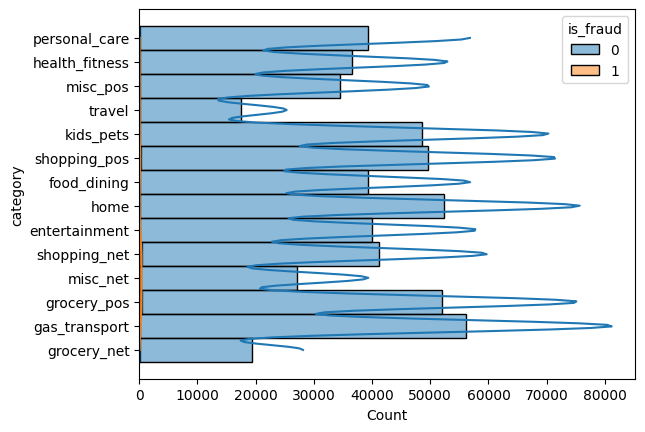

In [13]:
sns.histplot(data=df,y="category",hue="is_fraud",kde=True)

<ipython-input-14-2ea42e349558>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["is_fraud"])


<Axes: xlabel='is_fraud', ylabel='Density'>

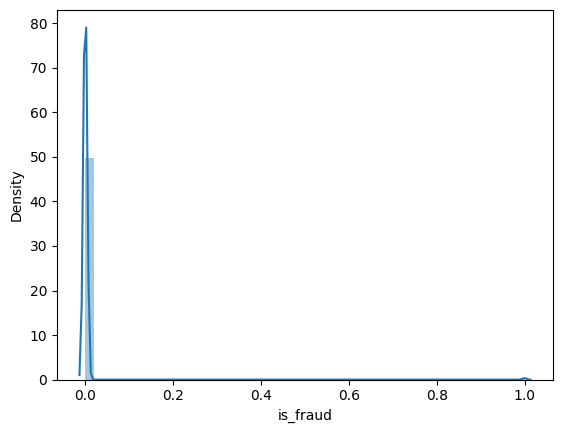

In [14]:
sns.distplot(df["is_fraud"])

<ipython-input-15-9d5b782c81cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["zip"])


<Axes: xlabel='zip', ylabel='Density'>

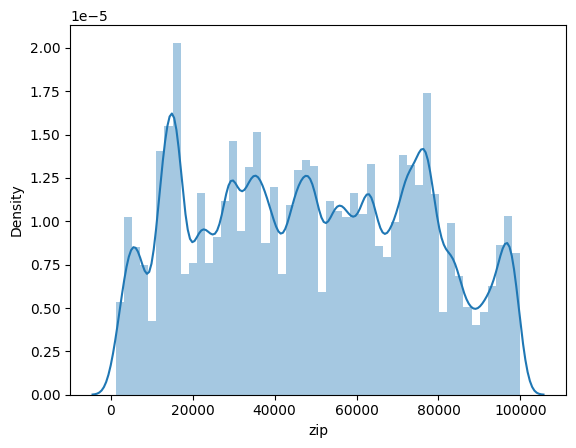

In [15]:
sns.distplot(df["zip"])

<Axes: xlabel='merchant', ylabel='Count'>

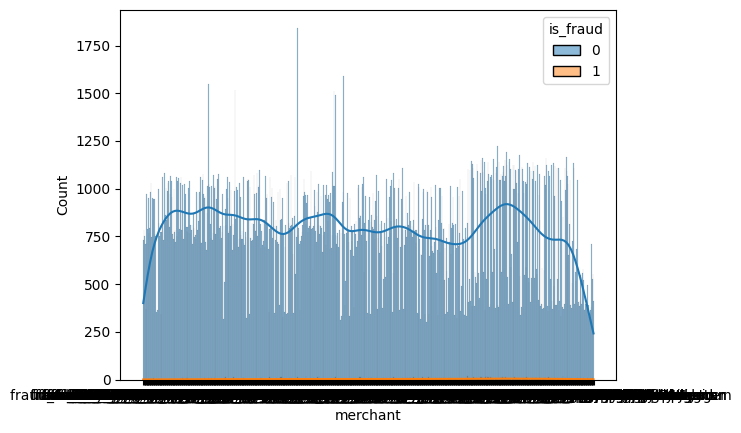

In [16]:
sns.histplot(data=df,x="merchant",hue="is_fraud",kde=True)

<Axes: xlabel='is_fraud', ylabel='Count'>

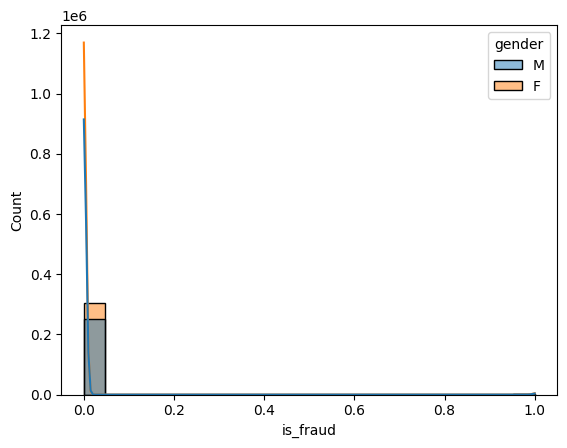

In [17]:
sns.histplot(data=df,x="is_fraud",hue="gender",kde=True)

<Axes: xlabel='lat', ylabel='Count'>

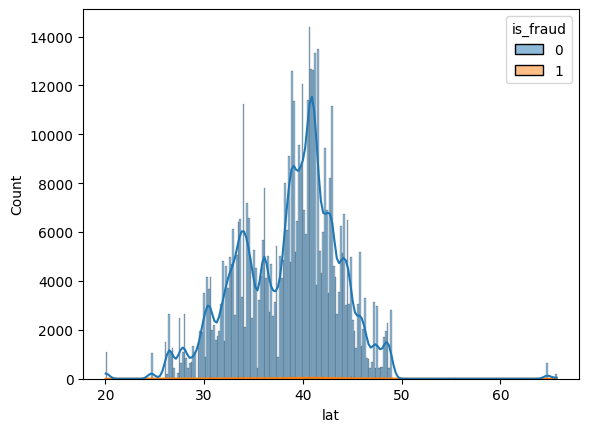

In [18]:
sns.histplot(data=df,x="lat",hue="is_fraud",kde=True)

<Axes: xlabel='is_fraud', ylabel='amt'>

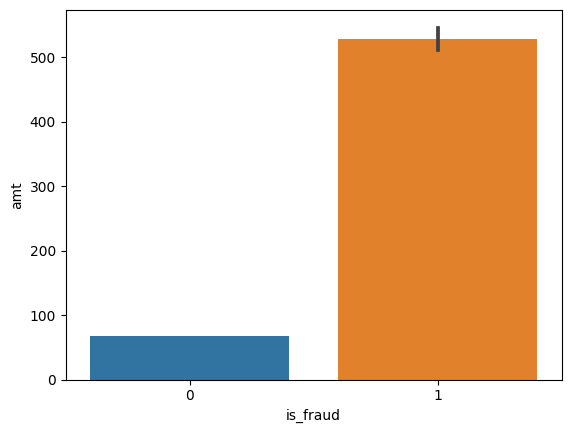

In [19]:
sns.barplot(data=df,y="amt",x="is_fraud")

<Axes: xlabel='is_fraud', ylabel='lat'>

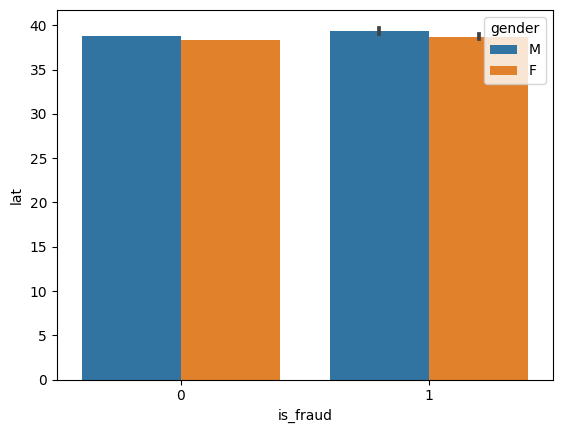

In [20]:
sns.barplot(data=df,y="lat",x="is_fraud",hue="gender")

<Axes: xlabel='is_fraud', ylabel='count'>

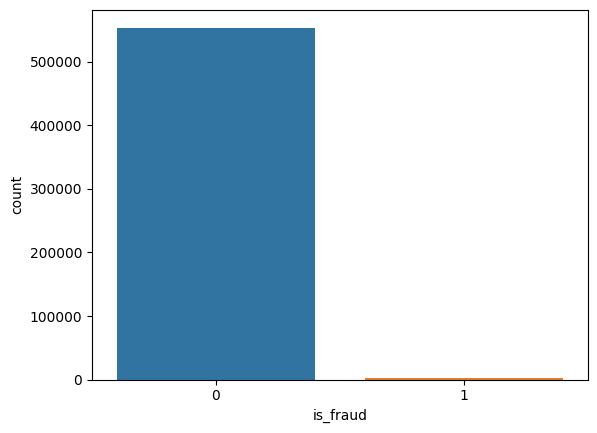

In [21]:
sns.countplot(x='is_fraud', data=df)

<Axes: xlabel='is_fraud', ylabel='count'>

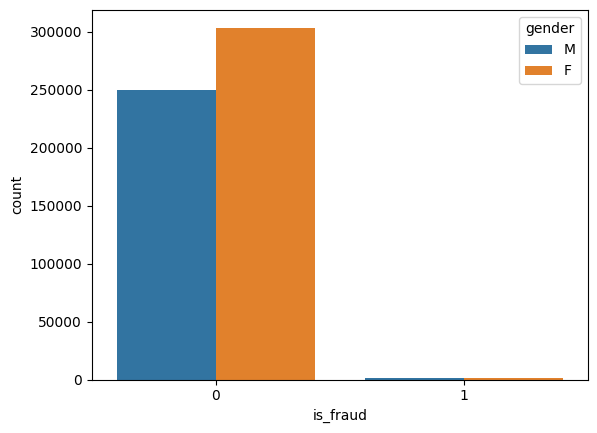

In [22]:
sns.countplot(x='is_fraud', hue='gender', data=df)

<Figure size 1500x1000 with 0 Axes>

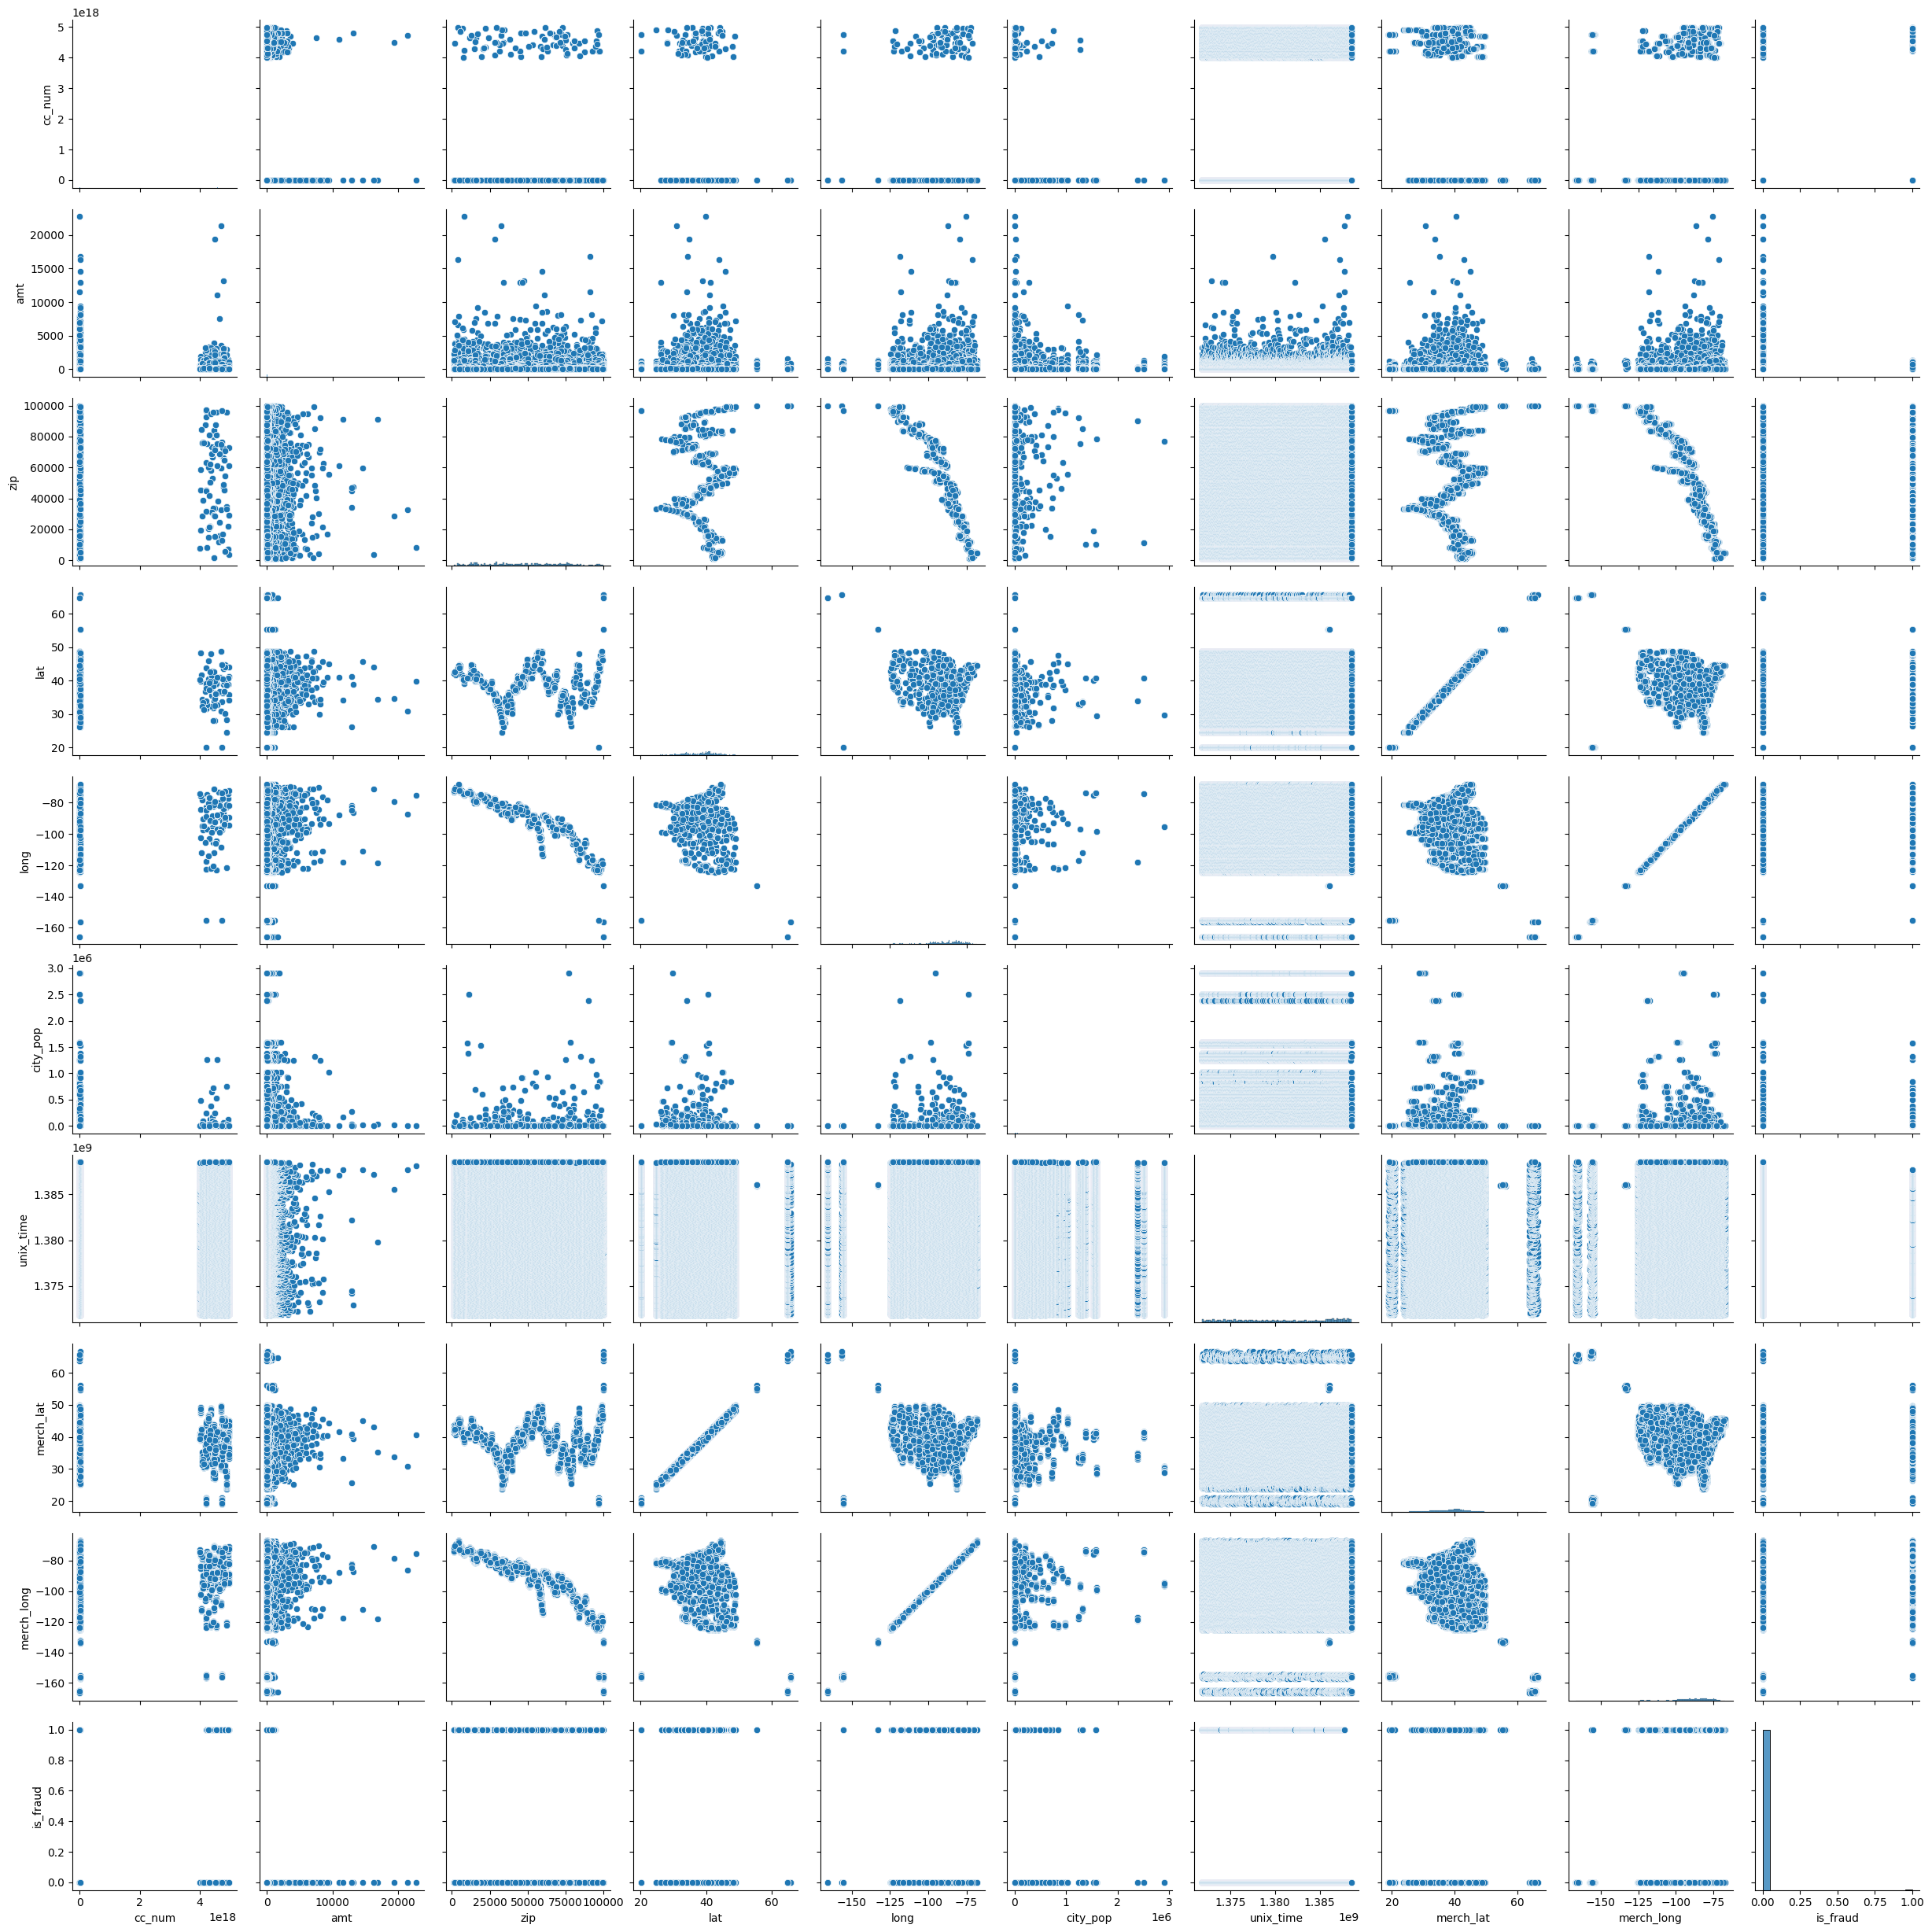

In [23]:
plt.figure(figsize=(15, 10))
sns.pairplot(df)

#Outlier Detection

<Axes: >

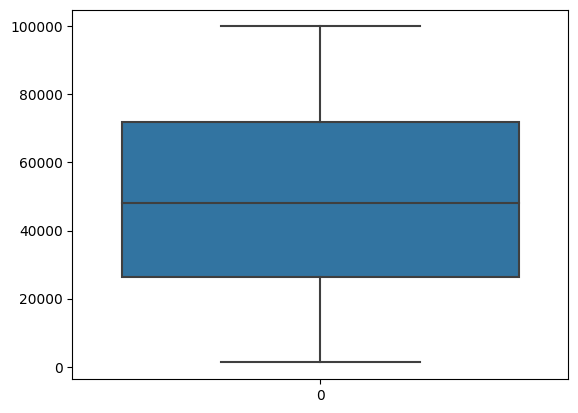

In [26]:
sns.boxplot(df.zip)

<Axes: >

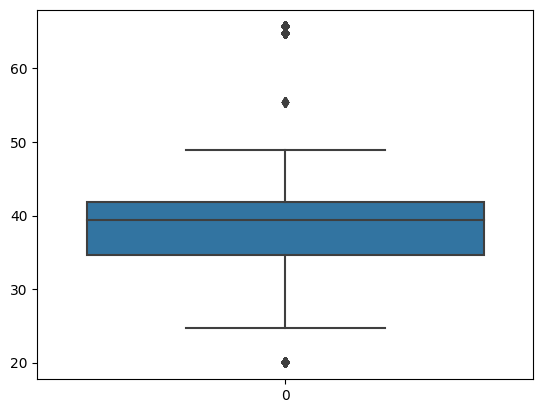

In [27]:
sns.boxplot(df.lat)

In [28]:
Q1 = df['lat'].quantile(0.25)
Q3 = df['lat'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 -(1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)
df['lat']=np.where(df['lat']>upper_whisker,upper_whisker,np.where(df['lat']<lower_whisker,lower_whisker,df['lat']))

<Axes: >

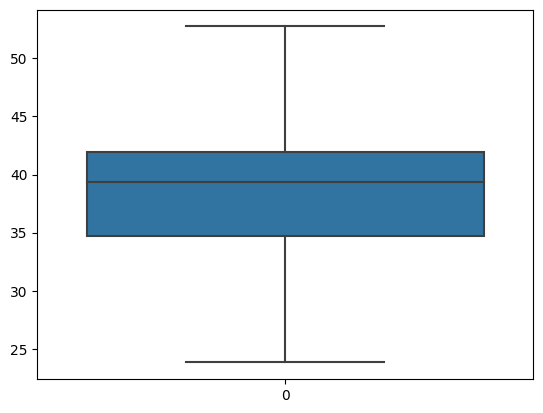

In [29]:
sns.boxplot(df.lat)

<Axes: >

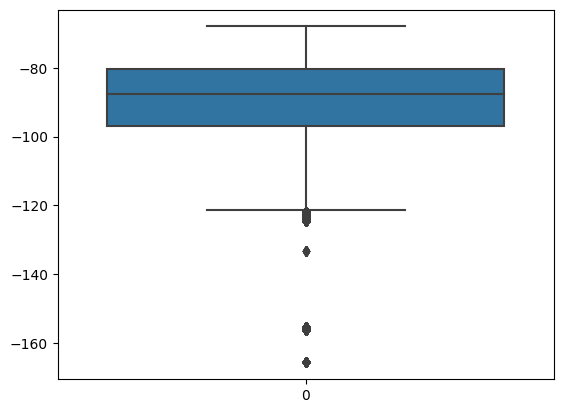

In [30]:
sns.boxplot(df.long)

In [31]:
Q1 = df['long'].quantile(0.25)
Q3 = df['long'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 -(1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)
df['long']=np.where(df['long']>upper_whisker,upper_whisker,np.where(df['long']<lower_whisker,lower_whisker,df['long']))

<Axes: >

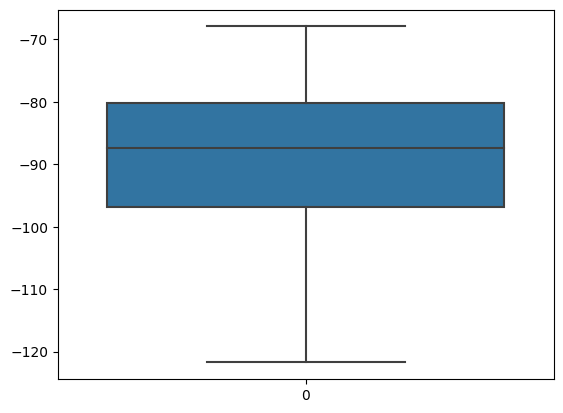

In [32]:
sns.boxplot(df.long)

<Axes: >

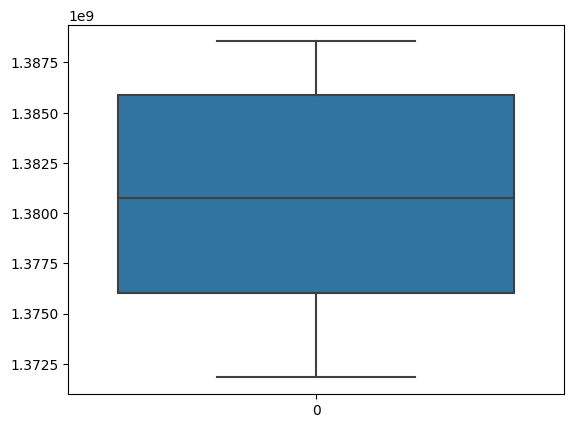

In [34]:
sns.boxplot(df.unix_time)

<Axes: >

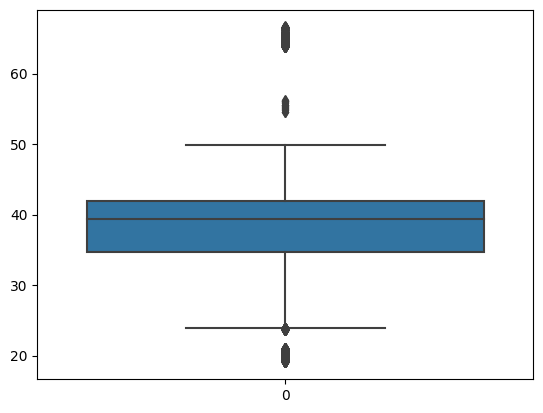

In [35]:
sns.boxplot(df.merch_lat)

In [36]:
Q1 = df['merch_lat'].quantile(0.25)
Q3 = df['merch_lat'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 -(1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)
df['merch_lat']=np.where(df['merch_lat']>upper_whisker,upper_whisker,np.where(df['merch_lat']<lower_whisker,lower_whisker,df['merch_lat']))

<Axes: >

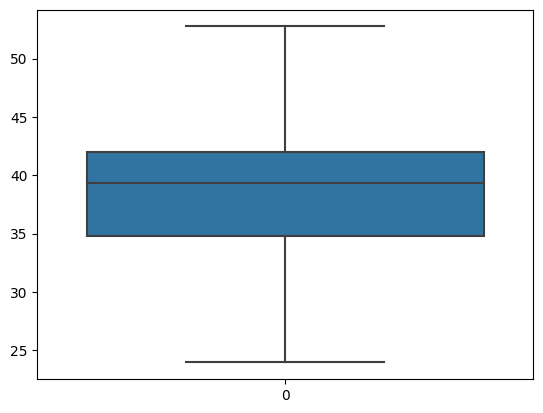

In [37]:
sns.boxplot(df.merch_lat)

<Axes: >

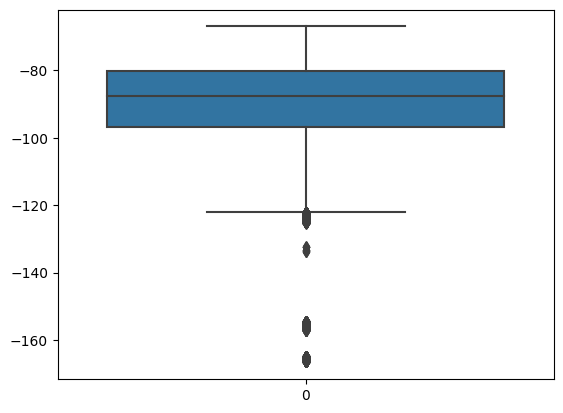

In [38]:
sns.boxplot(df.merch_long)

In [39]:
Q1 = df['merch_long'].quantile(0.25)
Q3 = df['merch_long'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 -(1.5*IQR)
upper_whisker = Q3 + (1.5*IQR)
df['merch_long']=np.where(df['merch_long']>upper_whisker,upper_whisker,np.where(df['merch_long']<lower_whisker,lower_whisker,df['merch_long']))

<Axes: >

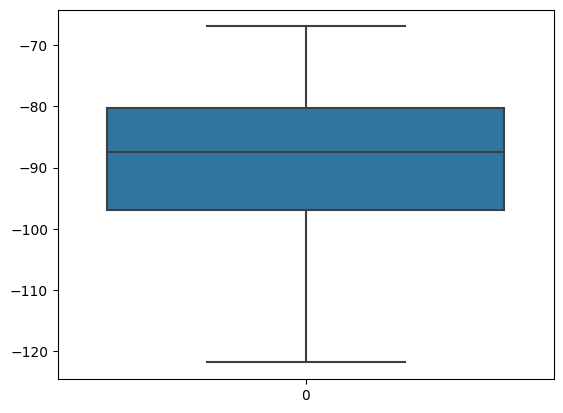

In [40]:
sns.boxplot(df.merch_long)

#Splitting Dependent and Independent variables

In [43]:
df.shape

(555719, 22)

In [46]:
x=df.iloc[:,:21]
x.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734


In [45]:
y = df['is_fraud']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

#Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
columns=["trans_date_trans_time","merchant","category","first","last","gender","street","city","state","job","dob","trans_num"]
x[columns]=x[columns].apply(le.fit_transform)

In [50]:
x.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2291163933867244,319,10,2.86,151,115,1,341,157,...,29209,33.9659,-80.9355,333497,275,376,98699,1371816865,33.986391,-81.200714
1,1,3573030041201292,591,10,29.84,163,457,0,354,16,...,84002,40.3207,-110.4360,302,392,760,108785,1371816873,39.450498,-109.960431
2,2,3598215285024754,611,5,41.28,24,249,0,865,61,...,11710,40.6729,-73.5365,34496,259,421,433979,1371816893,40.495810,-74.196111
3,3,3591919803438423,222,9,60.05,42,457,1,320,764,...,32780,28.5697,-80.8191,54767,407,718,71993,1371816915,28.812398,-80.883061
4,4,3526826139003047,292,13,3.19,247,261,1,548,247,...,49632,44.2529,-85.0170,1126,196,177,190585,1371816917,44.959148,-85.884734


#Feature Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns) #ms.fit_transform(x)-converts to numpy array-to amke it understandable convet to dataframe
x_scaled

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0.000000,4.589232e-04,0.460983,0.769231,0.000082,0.444118,0.244681,1.0,0.369447,0.185142,...,0.283305,0.350678,0.758558,0.114727,0.576520,0.413641,0.177606,0.000000e+00,0.348297,0.740526
1,0.000002,7.156895e-04,0.854046,0.769231,0.001267,0.479412,0.972340,0.0,0.383532,0.018868,...,0.838654,0.570540,0.210037,0.000096,0.821803,0.836084,0.195756,4.785402e-07,0.538053,0.216802
2,0.000004,7.207342e-04,0.882948,0.384615,0.001769,0.070588,0.529787,0.0,0.937161,0.071934,...,0.105945,0.582725,0.896132,0.011860,0.542977,0.463146,0.780934,1.674891e-06,0.574355,0.868083
3,0.000006,7.194732e-04,0.320809,0.692308,0.002594,0.123529,0.972340,1.0,0.346696,0.900943,...,0.319498,0.163981,0.760722,0.018834,0.853249,0.789879,0.129550,2.990876e-06,0.168617,0.746311
4,0.000007,7.064345e-04,0.421965,1.000000,0.000096,0.726471,0.555319,1.0,0.593716,0.291274,...,0.490300,0.706585,0.682668,0.000379,0.410901,0.194719,0.342953,3.110511e-06,0.729356,0.655229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,0.999993,6.109391e-06,0.732659,0.384615,0.001879,0.691176,0.670213,1.0,0.575298,0.522406,...,0.630382,0.576504,0.554852,0.000171,0.964361,0.367437,0.605327,9.999984e-01,0.555290,0.556008
555715,0.999994,7.124010e-04,0.381503,0.538462,0.004868,0.502941,0.902128,1.0,0.585049,0.472877,...,0.773423,0.180228,0.488865,0.009879,0.415094,0.979098,0.126633,9.999985e-01,0.198088,0.467628
555716,0.999996,1.204176e-03,0.716763,0.538462,0.003772,0.052941,0.508511,0.0,0.136511,0.122642,...,0.993939,0.773833,0.052629,0.001260,0.616352,0.669967,0.423035,9.999989e-01,0.788365,0.039167
555717,0.999998,8.051039e-07,0.108382,1.000000,0.000307,0.326471,0.727660,1.0,0.718310,0.561321,...,0.835016,0.719476,0.098228,0.000036,0.121593,0.364136,0.078360,9.999994e-01,0.712387,0.087136


#Splitting Data into Train and Test

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((444575, 21), (111144, 21), (444575,), (111144,))

In [74]:
x_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
139526,0.251475,0.000075,0.132948,0.153846,0.002668,0.200000,0.334043,1.0,0.211268,0.938679,...,0.190090,0.524006,0.831209,0.207006,0.649895,0.458746,0.777500,0.253087,0.500488,0.832135
395747,0.714474,0.000707,0.921965,0.692308,0.008167,0.920588,0.853191,0.0,0.293608,0.120283,...,0.290420,0.315229,0.753999,0.000586,0.859539,0.550055,0.776725,0.801711,0.291221,0.741931
395119,0.713345,0.000713,0.676301,0.307692,0.005561,0.200000,0.417021,1.0,0.052004,0.696934,...,0.859087,0.395323,0.181886,0.000253,0.427673,0.218922,0.756436,0.800831,0.427092,0.176440
552207,0.993685,0.000708,0.244220,0.538462,0.000679,0.626471,0.529787,0.0,0.335861,0.241745,...,0.625041,0.468494,0.606102,0.000771,0.825996,0.722772,0.226748,0.994670,0.495997,0.599913
487836,0.878873,0.001001,0.395954,0.384615,0.002047,0.658824,0.734043,0.0,0.290358,0.443396,...,0.637081,0.523535,0.504562,0.187542,0.224319,0.799780,0.417505,0.920946,0.533048,0.489993


In [75]:
y_train.head()

139526    0
395747    0
395119    0
552207    0
487836    0
Name: is_fraud, dtype: int64

In [76]:
x_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
119106,0.214612,7.568297e-05,0.024566,0.923077,0.000003,0.576471,0.642553,0.0,0.702059,0.386792,...,0.052542,0.610241,0.914008,0.001863,0.540881,0.347635,0.809328,0.216136,0.600202,0.911029
179292,0.323209,6.070026e-06,0.764451,0.538462,0.004128,0.823529,0.806383,1.0,0.001083,0.599057,...,0.737756,0.417233,0.476805,0.002456,0.402516,0.673267,0.693830,0.325997,0.388934,0.474547
540729,0.973262,6.062874e-06,0.065029,0.538462,0.001330,0.405882,0.123404,0.0,0.182015,0.117925,...,0.642311,0.560447,0.531248,0.000199,0.228512,0.180418,0.803794,0.982855,0.553270,0.523712
374360,0.675772,6.070026e-06,0.143064,0.153846,0.003165,0.823529,0.806383,1.0,0.001083,0.599057,...,0.737756,0.417233,0.476805,0.002456,0.402516,0.673267,0.564927,0.754241,0.443719,0.457599
314574,0.567647,8.288797e-07,0.513006,0.615385,0.000395,0.191176,0.974468,0.0,0.534128,0.047170,...,0.509446,0.610538,0.490524,0.000693,0.352201,0.476348,0.892141,0.617948,0.589158,0.491069


In [77]:
y_test.head()

119106    0
179292    0
540729    0
374360    0
314574    0
Name: is_fraud, dtype: int64

#**Model Building**


#Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [70]:
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
pred=model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
y_test

119106    0
179292    0
540729    0
374360    0
314574    0
         ..
444284    0
89444     0
298536    0
301993    0
354010    1
Name: is_fraud, Length: 111144, dtype: int64

#Evaluation of classification model

In [61]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [73]:
accuracy_score(y_test,pred)

0.9960861584970848

In [78]:
confusion_matrix(y_test,pred)

array([[110709,      9],
       [   426,      0]])

In [79]:
pd.crosstab(y_test,pred)

col_0,0,1
is_fraud,,
0,110709,9
1,426,0


In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



#Roc-AUC curve

In [81]:
probability=model.predict_proba(x_test)[:,1]
probability

array([0.00776899, 0.00294616, 0.00278424, ..., 0.00514998, 0.00532513,
       0.00157721])

In [82]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

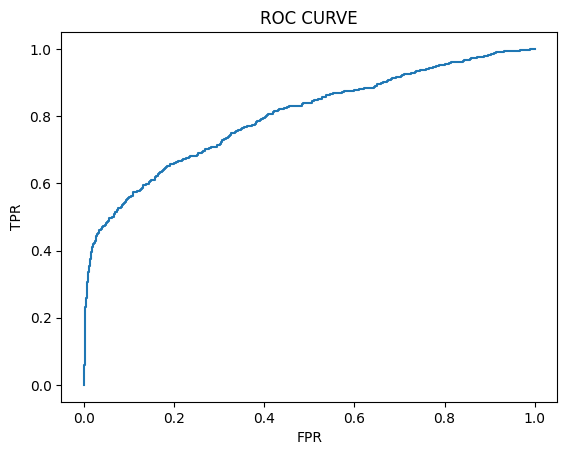

In [83]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

#Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)

In [85]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
pred=dtc.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
y_test

119106    0
179292    0
540729    0
374360    0
314574    0
         ..
444284    0
89444     0
298536    0
301993    0
354010    1
Name: is_fraud, Length: 111144, dtype: int64

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [89]:
accuracy_score(y_test,pred)

0.9970218815230691

In [90]:
confusion_matrix(y_test,pred)

array([[110537,    181],
       [   150,    276]])

In [91]:
pd.crosstab(y_test,pred)

col_0,0,1
is_fraud,,
0,110537,181
1,150,276


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.60      0.65      0.63       426

    accuracy                           1.00    111144
   macro avg       0.80      0.82      0.81    111144
weighted avg       1.00      1.00      1.00    111144



In [93]:
probability=dtc.predict_proba(x_test)[:,1]
probability

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
fpr,tpr,thresholds=roc_curve(y_test,probability)

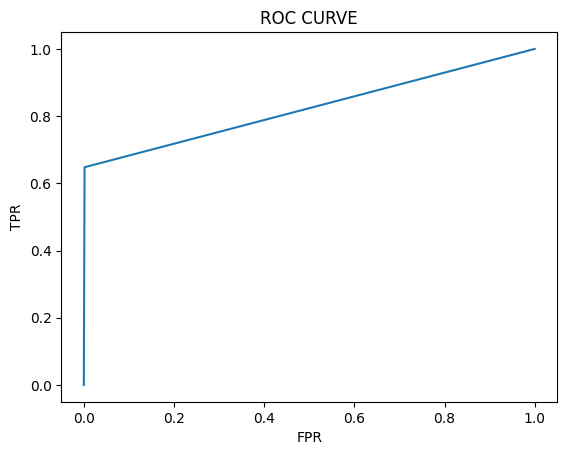

In [95]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

#Hyper parameter tuning

In [96]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    }

In [97]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameters,cv=5,scoring="accuracy")

In [98]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [99]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [100]:
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='auto',
                       random_state=42)

In [101]:
y_pred = best_estimator.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9961671345281796

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Random Forest**

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [105]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [106]:
pred1=rfc.predict(x_test)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
y_test

119106    0
179292    0
540729    0
374360    0
314574    0
         ..
444284    0
89444     0
298536    0
301993    0
354010    1
Name: is_fraud, Length: 111144, dtype: int64

In [108]:
accuracy_score(y_test,pred)

0.9970218815230691

In [109]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.60      0.65      0.63       426

    accuracy                           1.00    111144
   macro avg       0.80      0.82      0.81    111144
weighted avg       1.00      1.00      1.00    111144



#ROC-AUC curve

In [110]:
probability=rfc.predict_proba(x_test)[:,1]
probability

array([0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.04])

In [111]:
fpr,tpr,thresholds=roc_curve(y_test,probability)

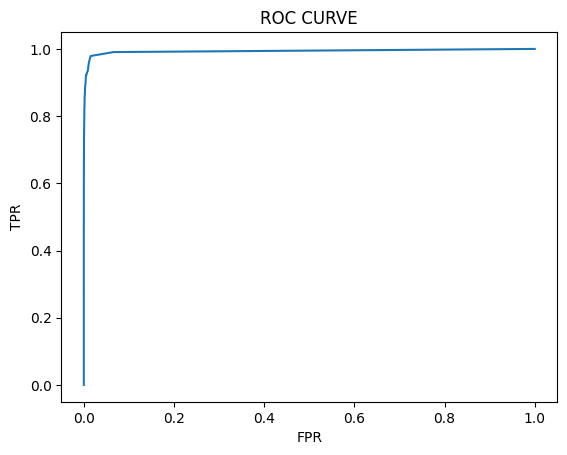

In [112]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()